In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = np.arange(-1.0, 1.1 , 0.1)
Y = np.arange(-1.0, 1.1 , 0.1)

In [6]:
input_data = []
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x,y])
        if y < np.sin(np.pi*x):
            correct_data.append([0,1])
        else:
            correct_data.append([1,0])
            
n_data = len(correct_data)
input_data = np.array(input_data)
correct_data = np.array(correct_data)

In [7]:
n_in = 2
n_mid = 6
n_out = 2

wb_width = 0.01
eta = 0.1
epoch = 101
interval = 10

In [8]:
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)#행렬이 n개인
        self.b = wb_width * np.random.randn(n)
        
    def forward(self,x):#입력이 들어오면 내부 변수에 저장
        self.x =x
        u = np.dot(x, self.w) + self.b #출력u구상
        self.y = 1/ (1 + np.exp(-u))# 활성함수 시그모이드 구상
        
    def backward(self, grad_y):
        delta = grad_y * (1-self.y) * self.y #시그모이드 함수 미분
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):#가중치 업데이트
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [10]:
class OutputLayer: #출력레이어 설계
    def __init__(self,n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)#행렬이 n개인
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x =x
        u = np.dot(x, self.w) + self.b #출력u구상
        self.y = np.exp(u) / np.sum(np.exp(u),axis = 1, keepdims=True)
        
    def backward(self, t): #출력에 타깃이 들어옴
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):#가중치 업데이트
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [11]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

In [12]:
sin_data = np.sin(np.pi*X) #결과 검증용

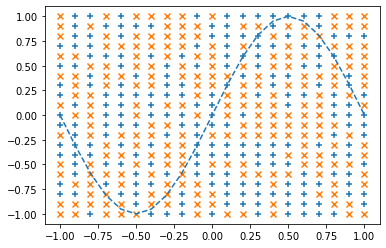

Epoch:0/101 Error:0.7275365665791642


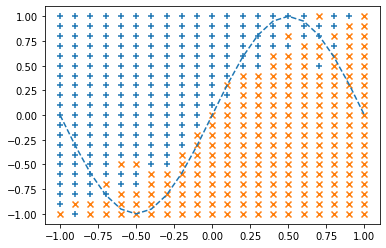

Epoch:10/101 Error:0.3058130656989769


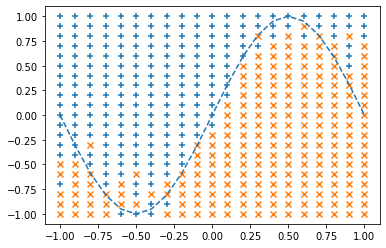

Epoch:20/101 Error:0.2117741820809102


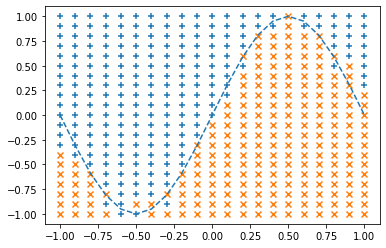

Epoch:30/101 Error:0.16345765673512755


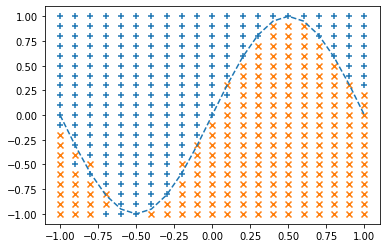

Epoch:40/101 Error:0.12499080281567665


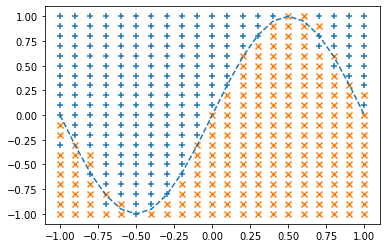

Epoch:50/101 Error:0.10562347449628759


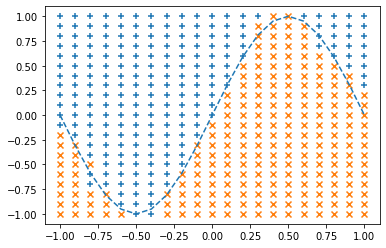

Epoch:60/101 Error:0.09477748427213496


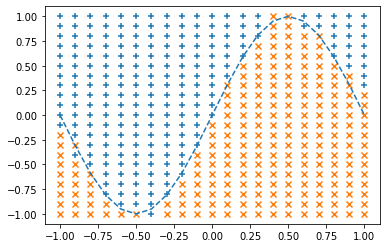

Epoch:70/101 Error:0.08158769154724554


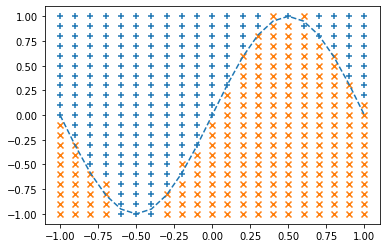

Epoch:80/101 Error:0.08499254954686866


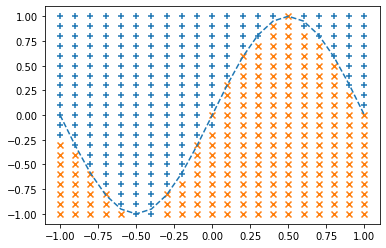

Epoch:90/101 Error:0.07294368964638327


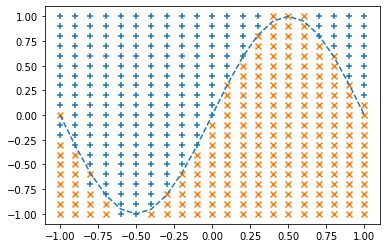

Epoch:100/101 Error:0.06165451201032696


In [14]:
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    
    for idx in index_random:
        x = input_data[idx]#x값 하나만 가져옴
        t = correct_data[idx]#타깃 정답
        
        middle_layer.forward(x.reshape(1,2))#featur 2개
        output_layer.forward(middle_layer.y)
        
        #역전파
        output_layer.backward(t.reshape(1,2))#featur 2개
        middle_layer.backward(output_layer.grad_x)
        
        #가중치
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1)#-1은행렬을 1차원으로 바꾼다
            
            total_error += -np.sum(t * np.log(y + 1e-7))
            
            #분류
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
            
    if i % interval == 0:
        plt.plot(X, sin_data, linestyle='dashed')
        plt.scatter(x_1, y_1, marker='+')
        plt.scatter(x_2, y_2, marker='x')
        plt.show()
        
        print("Epoch:" + str(i) + '/' + str(epoch),
              "Error:" + str(total_error / n_data))
                             